## focus on soc measurements

In [1]:
import pandas as pd
import numpy as np
df = pd.read_parquet('./material/soc.topsoil_organized.pq')
print('original', df.shape)

original (101150, 613)


## deal with incomplete data

In [2]:
drop_col = []
covs = df.columns[18:-2].tolist() # extract all the covaraites
for ii in covs:
    inum = df[ii].isna().sum()
    irto = round(inum/len(df),2)
    if 'accum.nd' in ii:
        drop_col.append(ii)
    if irto>0.0005:
        print(ii, irto)     

accum.ndwi_glad.landsat.seasconv.m.yearly_p50_30m_s_YYYY0101_YYYY1231_eu_epsg.3035_v20240513 0.01
accum.ndvi_glad.landsat.seasconv.m.yearly_p50_30m_s_YYYY0101_YYYY1231_eu_epsg.3035_v20240513 0.28
CHELSA_swe_1981-2010_V.2.1 0.68


In [3]:
drop_col.append('CHELSA_swe_1981-2010_V.2.1')
df = df.drop(columns=drop_col)  
print('drop nan col', df.shape)

drop nan col (101150, 608)


In [4]:
print(len(covs))
covs = [ii for ii in covs if ii not in drop_col]
print(len(covs))

# import json
# with open("./material/cov_all.json", "w") as fp:
#     json.dump(covs, fp)

593
588


## data split

In [5]:
ttid = pd.read_csv('./material/test_temporal_ids.txt', header=None)[0].tolist() 
print(len(ttid))
ttid = [str(i) for i in ttid]

dft = df.loc[df['id'].isin(ttid)] # used exclusively for soc temporal validation
df = df.loc[~df['id'].isin(ttid)]
print(df.shape)

300
(100250, 608)


In [6]:
from model_fit import separate_data
version = 'v20250301'
cal, train, test = separate_data('soc', 'log1p', './material/', version, df, ['tile_id','ref'])

/opt/conda/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


402 small strata groups, with 1901 data records
size: calibration 8347, training 87552, test 4351
ratio: calibration 0.08, training 0.87, test 0.04
sum 100250, df 100250


In [7]:
print(test.shape)
test = pd.concat([test, dft])
print(test.shape)

(4351, 609)
(5251, 609)


In [8]:
test.to_parquet(f'./material/data_test.all_soc_{version}.pq')

## transformation check

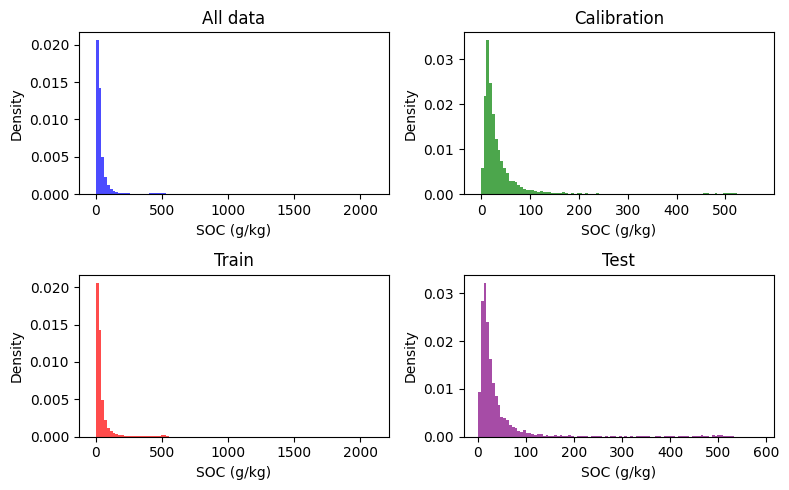

In [9]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

axes[0, 0].hist(df["soc"], bins=100, alpha=0.7, color="blue", density=True)
axes[0, 0].set_title("All data")
axes[0, 0].set_xlabel("SOC (g/kg)")
axes[0, 0].set_ylabel("Density")

axes[0, 1].hist(cal["soc"], bins=100, alpha=0.7, color="green", density=True)
axes[0, 1].set_title("Calibration")
axes[0, 1].set_xlabel("SOC (g/kg)")
axes[0, 1].set_ylabel("Density")

axes[1, 0].hist(train["soc"], bins=100, alpha=0.7, color="red", density=True)
axes[1, 0].set_title("Train")
axes[1, 0].set_xlabel("SOC (g/kg)")
axes[1, 0].set_ylabel("Density")

axes[1, 1].hist(test["soc"], bins=100, alpha=0.7, color="purple", density=True)
axes[1, 1].set_title("Test")
axes[1, 1].set_xlabel("SOC (g/kg)")
axes[1, 1].set_ylabel("Density")

plt.tight_layout()
plt.show()

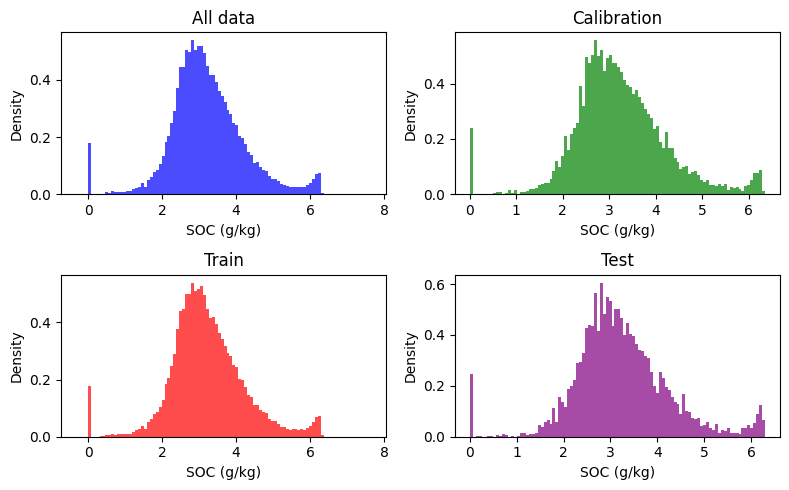

In [10]:
import numpy as np
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

axes[0, 0].hist(df["soc_log1p"], bins=100, alpha=0.7, color="blue", density=True)
axes[0, 0].set_title("All data")
axes[0, 0].set_xlabel("SOC (g/kg)")
axes[0, 0].set_ylabel("Density")

axes[0, 1].hist(cal["soc_log1p"], bins=100, alpha=0.7, color="green", density=True)
axes[0, 1].set_title("Calibration")
axes[0, 1].set_xlabel("SOC (g/kg)")
axes[0, 1].set_ylabel("Density")

axes[1, 0].hist(train["soc_log1p"], bins=100, alpha=0.7, color="red", density=True)
axes[1, 0].set_title("Train")
axes[1, 0].set_xlabel("SOC (g/kg)")
axes[1, 0].set_ylabel("Density")

axes[1, 1].hist(test["soc_log1p"], bins=100, alpha=0.7, color="purple", density=True)
axes[1, 1].set_title("Test")
axes[1, 1].set_xlabel("SOC (g/kg)")
axes[1, 1].set_ylabel("Density")

plt.tight_layout()
plt.show()

## feature selection

In [11]:
from model_fit import cfi_calc
import pandas as pd
prop = 'soc'
tgt = 'soc_log1p'
space = 'log1p'
output_folder = './metric/'
version = 'v20250301'
cal = pd.read_parquet(f'./material/data_cal_soc_{version}.pq')
cal = cal.dropna(subset = covs+[tgt])
import json
with open("./material/cov_all.json", "r") as fp:
    covs = json.load(fp)
    
cfi = cfi_calc(cal, tgt, prop, space, output_folder, version, covs) # produce

start bootstrap on different subset...
[15:00:04] 0 iteration, training size: 5805
[15:00:12] 1 iteration, training size: 5805
[15:00:20] 2 iteration, training size: 5805
[15:00:28] 3 iteration, training size: 5805
[15:00:36] 4 iteration, training size: 5805
[15:00:45] 5 iteration, training size: 5805
[15:00:53] 6 iteration, training size: 5805
[15:01:02] 7 iteration, training size: 5805
[15:01:10] 8 iteration, training size: 5805
[15:01:19] 9 iteration, training size: 5805
[15:01:28] 10 iteration, training size: 5805
[15:01:37] 11 iteration, training size: 5805
[15:01:45] 12 iteration, training size: 5805
[15:01:54] 13 iteration, training size: 5805
[15:02:02] 14 iteration, training size: 5805
[15:02:10] 15 iteration, training size: 5805
[15:02:19] 16 iteration, training size: 5805
[15:02:27] 17 iteration, training size: 5805
[15:02:35] 18 iteration, training size: 5805
[15:02:44] 19 iteration, training size: 5805


[15:13:52] processing 0.0 ...
[15:14:57] processing 0.0002 ...
[15:15:46] processing 0.0004 ...
[15:16:29] processing 0.0006000000000000001 ...
[15:17:11] processing 0.0008 ...
[15:17:49] processing 0.001 ...
[15:18:23] processing 0.0012000000000000001 ...
[15:18:52] processing 0.0014 ...
[15:19:17] processing 0.0016 ...
[15:19:38] processing 0.0018000000000000002 ...
[15:19:55] processing 0.002 ...
[15:20:09] processing 0.0022 ...
[15:20:19] processing 0.0024000000000000002 ...
[15:20:28] processing 0.0026000000000000003 ...
[15:20:35] processing 0.0028 ...
[15:20:40] processing 0.003 ...
[15:20:44] processing 0.0032 ...
[15:20:48] processing 0.0034000000000000002 ...
[15:20:51] processing 0.0036000000000000003 ...
[15:20:54] processing 0.0038 ...
[15:20:56] processing 0.004 ...
[15:20:59] processing 0.004200000000000001 ...
[15:21:01] processing 0.0044 ...
[15:21:02] processing 0.0048000000000000004 ...
[15:21:04] processing 0.005 ...
[15:21:06] processing 0.0058000000000000005 ...
[

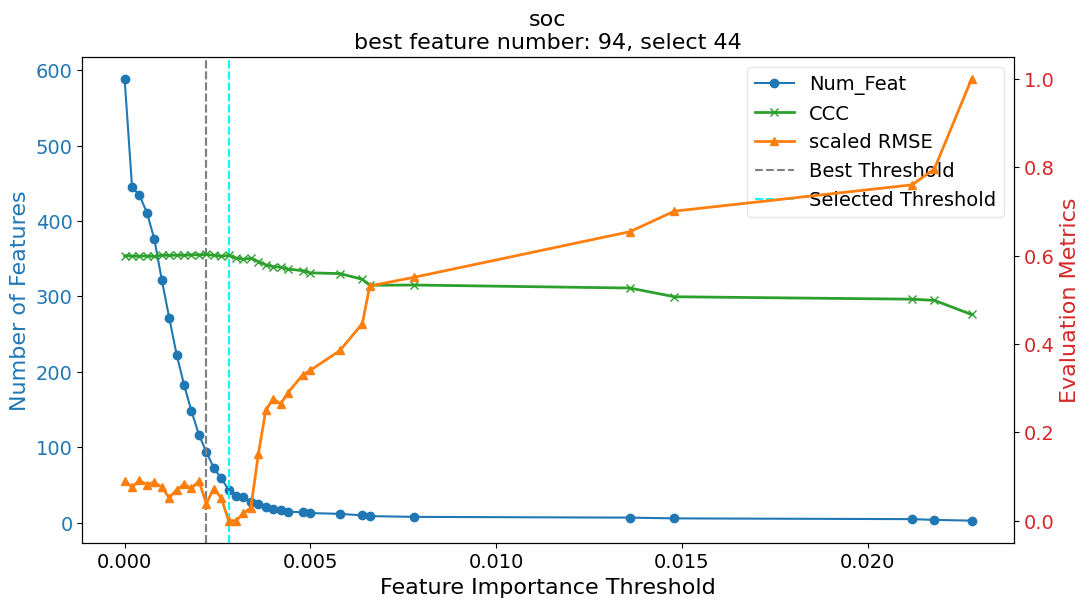

In [16]:
from model_fit import rscfi
cov = rscfi(cal, tgt, prop, space, output_folder, version, covs, cfi, [10,50], step_size=0.0002) # produce

### Mannually select covs
- this proves to be not super successful

In [35]:
# drop_col = []
# mend_col = ['lithology_egdi_prob_peat']
# monthly_col = ['YYYY0131','YYYY0201','YYYY0301','YYYY0401','YYYY0501','YYYY0601',
#                'YYYY0701','YYYY0801','YYYY0901','YYYY1001','YYYY1101','YYYY1201']
# monthly_col2 = [ii[0:4]+'.'+ii[4:6]+'.'+ii[6::] for ii in monthly_col]
# monthly_col = monthly_col+monthly_col2

# for ii in covs:
#     if 'lithology_' in ii:
#         drop_col.append(ii)
#     if 'CHELSA_pr' in ii:
#         drop_col.append(ii)
#     for im in monthly_col:
#         if im in ii:
#             drop_col.append(ii)
#             break
            
#     if 'theilslopes' in ii:
#         drop_col.append(ii)
        
#     if 'pft' in ii:
#         drop_col.append(ii)
        
#     if 'mcd43a4' in ii:
#         drop_col.append(ii)
        
#     if 'esa.cci' in ii:
#         drop_col.append(ii)
        
#     if 'soil.moisture' in ii:
#         drop_col.append(ii)
        

# ncov = [ii for ii in covs if ii not in drop_col]   
# ncov = ncov + mend_col

# version = 'v20250301_mannual'
# cfi = cfi_calc(cal, tgt, prop, space, output_folder, version, mcov)
# mmcov = rscfi(cal, tgt, prop, space, output_folder, version, mcov, cfi, [10,100], step_size=0.0002) 

## paramter fine-tuning

In [17]:
from model_fit import parameter_fine_tuning, read_features
version = 'v20250301'
prop = 'soc'
tgt = 'soc_log1p'
cal = pd.read_parquet(f'./material/data_cal_soc_{version}.pq')
cal = cal.dropna(subset=cov+[tgt])
cov = read_features(f'./metric/feature_selected_soc_{version}.txt')
models, model_names = parameter_fine_tuning(cal, cov, tgt, prop, './model/', version)

[15:21:16] ----------------------rf------------------------
n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 34
max_resources_: 8321
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 405
n_resources: 34
Fitting 5 folds for each of 405 candidates, totalling 2025 fits
----------
iter: 1
n_candidates: 135
n_resources: 102
Fitting 5 folds for each of 135 candidates, totalling 675 fits
----------
iter: 2
n_candidates: 45
n_resources: 306
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 3
n_candidates: 15
n_resources: 918
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 4
n_candidates: 5
n_resources: 2754
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 5
n_candidates: 2
n_resources: 8262
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [18]:
models[0]


RandomForestRegressor(max_depth=20, max_features=0.3, min_samples_leaf=4,
                      min_samples_split=5, n_estimators=80)

In [19]:
len(models[0].feature_names_in_)

44